   #                  <h1><center>Practice your new data analysis skills by helping your friend find an Airbnb</center></h1>    


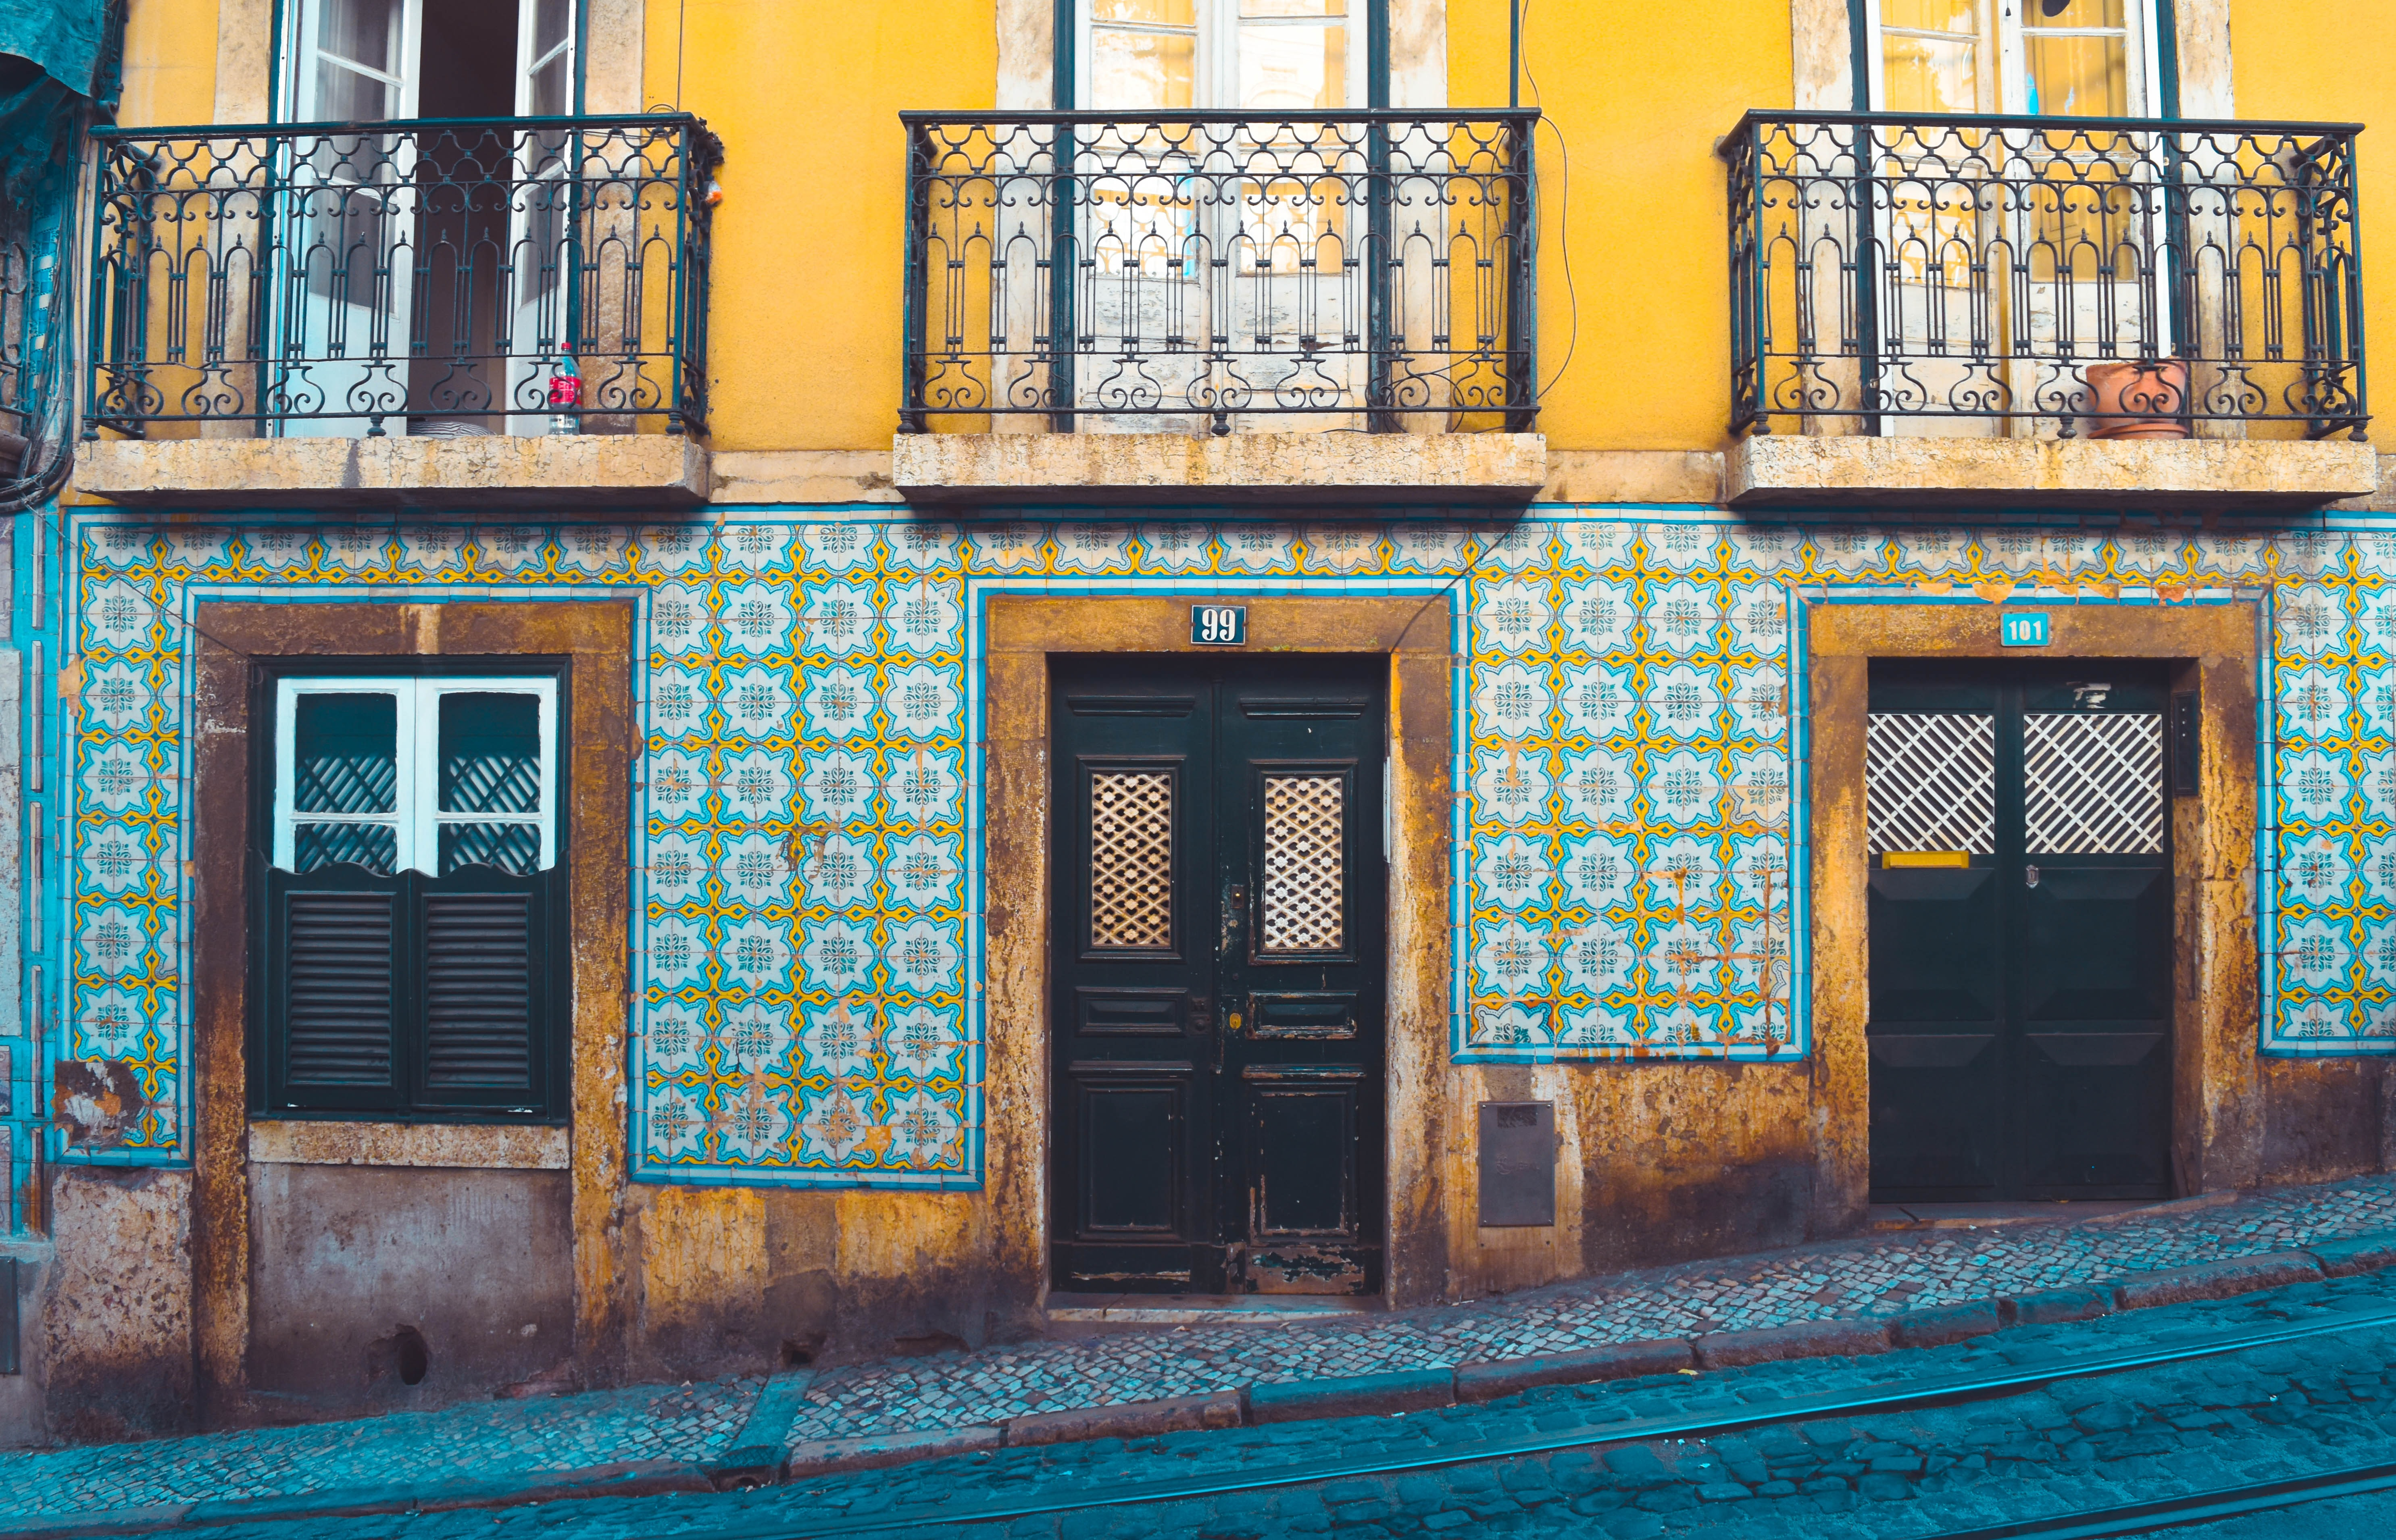

If you are looking forward to migrating to the data field, you must be flooded with advanced terms like lambda functions, Regex expressions, Machine learning, Linear regressions and others complicated terms. All this knowledge it's essential but don’t get anxious! We can start with simple things such as helping a friend with some daily issues. 

In this particular case, we will help a imaginary family that needs to rent an Airbnb home/apartment in Portugal with the following features:

- The apartment should be located in Parque das Nações (a neighborhood in Lisbon - Portugal)
- The value must be at a maximum of 60 euros.
- The type of accommodation must be "Entire House" type.

Since we already know the problem, we can start solving it. We are going to use the Airbnb Lisbon dataset.

First, we need to import the libraries that we are going to use. The libraries for this project are: Pandas for analyzing, manipulating, and fixing some dataset issues; Matploblib/Seaborn for statistical methods and simple data visualization and Folium to build our map.


### Importing the libraries

So let's start! If you are using google colab, you should first use ! pip install in all of these libraries before importing.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.pyplot as plt

%matplotlib inline 
rcParams["figure.figsize"] = 10, 8
sns.set_style("whitegrid")

### Import the data

In this part, we will import the data and put it inside a variable called "airdf."

In [59]:
airdf= pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-02-13/visualisations/listings.csv")

### First look at the data frame

 In this part, we will take the first look at how many columns and rows we have in our dataframe. For that, we can use the attribute ".shape" to set the columns and rows and print it with "print()" We use shape [1] for columns, shape [0] for the number of rows, and we use the .format to make sure that everything is in the right place, replacing the braces with information in the final parentheses.


In [60]:
# For that, we use the attribute ".shape" related to our dataset (airdf) and we use "1" for columns and "0" for rows, and we use the function "print" to see.
print("The dataframe has {} columns and {} rows".format(airdf.shape[1],airdf.shape[0]))

The dataframe has 16 columns and 19877 rows


Since we already know the size of the data frame, let's look at the columns and rows using the method "head." on our dataset.


In [61]:
airdf.head(5)

id                                      name  host_id host_name  \
0   6499      Belém 1 Bedroom Historical Apartment    14455     Bruno   
1  25659           Heart of Alfama - Lisbon Center   107347     Ellie   
2  29248  Apartamento Alfama com vista para o rio!   125768   Bárbara   
3  29396          Alfama Hill - Boutique apartment   126415    Mónica   
4  29915       Modern and Cool Apartment in Lisboa   128890      Sara   

  neighbourhood_group      neighbourhood  latitude  longitude  \
0              Lisboa               Belm  38.69750   -9.19768   
1              Lisboa  Santa Maria Maior  38.71167   -9.12696   
2              Lisboa  Santa Maria Maior  38.71272   -9.12628   
3              Lisboa  Santa Maria Maior  38.71156   -9.12987   
4              Lisboa     Avenidas Novas  38.74712   -9.15286   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     40               3                 27  2021-01-26   
1  Entire home/apt     30              10                113  2019-12-08   
2  Entire home/apt     38               3                325  2021-01-10   
3  Entire home/apt     25               2                265  2021-01-22   
4  Entire home/apt     48               5                 40  2021-01-24   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.34                               1               341  
1               1.36                               1               108  
2               2.64                               1               303  
3               2.49                               2               323  
4               0.31                               1               294

### Data cleaning - Columns

For the data cleaning section, we need to look at which columns can be used in our analysis.

In [62]:
## We use ".columns" to check the columns names.
airdf.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

As we can see, there are plenty of unusable columns in this dataframe. Columns like "calculated_host_listings_count", "reviews_per_month" are not useful at all and we need to drop those columns. We are using the "inplace = True" because we need to make the changes in the real dataframe.


In [63]:
#Droping the columns with the atribbute ".drop"
airdf.drop(['number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','last_review'],axis=1, inplace=True)

Now that we cleaned the columns, that will not be helpful. Let’s look at how it is now.

In [64]:
airdf.head(5)

id                                      name  host_id host_name  \
0   6499      Belém 1 Bedroom Historical Apartment    14455     Bruno   
1  25659           Heart of Alfama - Lisbon Center   107347     Ellie   
2  29248  Apartamento Alfama com vista para o rio!   125768   Bárbara   
3  29396          Alfama Hill - Boutique apartment   126415    Mónica   
4  29915       Modern and Cool Apartment in Lisboa   128890      Sara   

  neighbourhood_group      neighbourhood  latitude  longitude  \
0              Lisboa               Belm  38.69750   -9.19768   
1              Lisboa  Santa Maria Maior  38.71167   -9.12696   
2              Lisboa  Santa Maria Maior  38.71272   -9.12628   
3              Lisboa  Santa Maria Maior  38.71156   -9.12987   
4              Lisboa     Avenidas Novas  38.74712   -9.15286   

         room_type  price  minimum_nights  
0  Entire home/apt     40               3  
1  Entire home/apt     30              10  
2  Entire home/apt     38               3  
3  Entire home/apt     25               2  
4  Entire home/apt     48               5

Much more intuitive and only with what we need. You might be asking yourself, "What's the id, Name, and Host_id for?" In the end, you will understand how valuable those columns are. 

### Data cleaning - Empty data and duplicated entries

Now we are going to look after empty data. For that, we are going to use the method ".isnull" applied to the dataset. This attribute will give us a complete list of empty entries in which column. 


In [65]:
airdf.isnull().sum()

id                      0
name                   10
host_id                 0
host_name               6
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
dtype: int64

As you notice, we have sixteen empty entries for "name" and host_name, but since the column "ID" is complete, that's not a big problem.

Let's replace the empty entries with the string "no_name" to make our life easier. As we are beginners and tend to mess up, I will also create another dataset called "airdfc". The "c" stands for "Clean version".


In [66]:
airdfc = airdf.fillna("no_name")

Let's take a look if it works?

In [67]:
airdfc.isnull().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
dtype: int64

All clear!

Now is time to check the duplicated data. This kind of problem can lead to an unrealistic data visualization and can confuse your data analysis. For that, we can use the method ".duplicated" to hunt those duplicated entries. 

In [68]:
airdfc.duplicated().sum()

0

All clear, let's move on.

### Problem-solving

This is the first problem we are going to solve: 

The price must be at a maximum of 60 euros.

The easiest way of checking the price range of the accommodation is using the method ".describe()" in the dataframe.

In [69]:
airdfc["price"].describe()

count    19877.000000
mean        95.248126
std        260.058829
min          0.000000
25%         40.000000
50%         60.000000
75%         94.000000
max      20199.000000
Name: price, dtype: float64

That's some good news! Even thought our mean is "95", the "50%" means that 50% of our data have the value of 60 euros or below. But '0' euros doesn't make sense to us, so to make it easier, let's take it off. First, we need to find the entries with the 0 value and then drop them.

In [70]:
# Looking for the entries with 0 on the price
airdfc.loc[(airdfc["price"] <= 0 )]

id             name    host_id host_name neighbourhood_group  \
18539  44316116  Pestana Cascais  357437593   Pestana             Cascais   

           neighbourhood  latitude  longitude   room_type  price  \
18539  Cascais e Estoril  38.69687   -9.43817  Hotel room      0   

       minimum_nights  
18539               1

Since we only have one entry in this particular case, let’s drop it.

In [71]:
# Let's drop it
airdfc.drop(airdfc.index[18539], inplace=True)

Final check to see with everything is alright:

In [72]:
airdfc.loc[(airdfc["price"] <= 0 )]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights]
Index: []

  After cleaning the zeros, it's time to take all the values above 60, because as we saw before, 60 is our maximum value. Using the same logic used for zeros, we can check the useless daily fees. Unfortunately, we can't use the same method as before. We would take hours to drop row by row. Let's use something easier:

In [73]:
airdfc.drop(airdfc.loc[airdfc["price"]> 60].index, inplace=True)

Let’s check.

In [74]:
airdfc.loc[(airdfc["price"] > 60 )]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights]
Index: []

All clear!

After that, we can check how much data we still have and plot a graph to visualize the price distribution.

In [75]:
print("The dataframe has {} columns and {} rows".format(airdfc.shape[1],airdfc.shape[0]))

The dataframe has 11 columns and 10177 rows


### Analyzing the "minimum_nigths"


As my friends will spend only 15 days in Lisbon, there is no reason why we should keep rows with more than 15 days of minimum nights, right?.


In [76]:
airdfc["minimum_nights"].describe()

count    10177.000000
mean         4.085683
std         16.321400
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1000.000000
Name: minimum_nights, dtype: float64

After looking at the stats, it is notable that 1000 days of minimum nights are totally out of our goal. So let's get this right. 

In [77]:
#here we drop everything bigger then 15 nights
airdfc.drop(airdfc.loc[airdfc["minimum_nights"]> 15].index, inplace=True)
#here we check if everything went right.
airdfc.loc[(airdfc["minimum_nights"] > 15 )]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights]
Index: []

### Analyzing the "room_type" variable

As mentioned before, the family needs the entire home/apt type of staying. So it's our job to filter that up. Let's take a look in the distribution of the accommodations. Here we have two simple data visualizations that you can use! You can use both or choose the one you like the most.

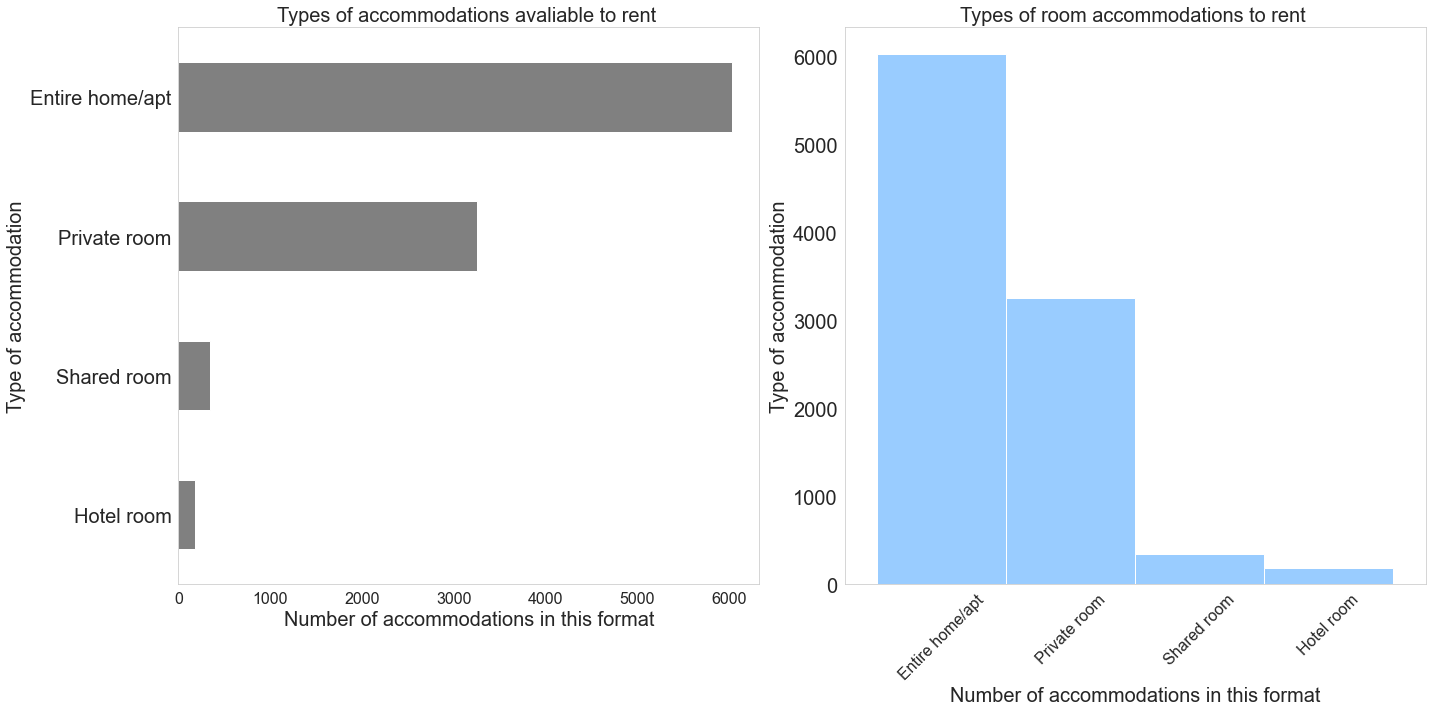

In [78]:
#Figure size
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)
#Subplot so we can put two graphs in the same cell 
ax1 = fig.add_subplot(121)
#We choose the data we want to plot and set (ascending=True) so we set the order of the plot
feq1 =airdfc["room_type"].value_counts().sort_values(ascending=True)
#Color set
ax1= feq1.plot.barh(color = "gray")
#Label and fontsize
plt.ylabel("Type of accommodation",fontsize=20)
#Label and fontsize
plt.xlabel("Number of accommodations in this format", fontsize=20)
#Graph tittle and fontsize
plt.title("Types of accommodations avaliable to rent ", fontsize=20)
#No grids
ax1.grid(False)

#######################################################################
#subplot so we can put two graphs in the same cell 
ax2 = fig.add_subplot(122)
#We choose the data we want to plot and set (ascending=True) so we set the order of the plot
feq2 =airdfc["room_type"].value_counts().sort_values(ascending=False)
#color set, size and rotation
ax2=feq2.plot.bar(color= '#99CCFF', width=1, rot=45)
#Graph tittle and fontsize
plt.title("Types of room accommodations to rent ", fontsize=20)
#Label and fontsize
plt.ylabel("Type of accommodation",fontsize=20)
#Label and fontsize
plt.xlabel("Number of accommodations in this format", fontsize=20)
#No grids
ax2.grid(False)

plt.tight_layout()
plt.show()

As our priority is "entire home/apt", we are good! Most of the accommodations are in that format. So, let's leave only accommodations in this format.

In [79]:
airdfc.drop(airdfc.loc[airdfc["room_type"]!= "Entire home/apt"].index, inplace=True)

You can use groupby to check if everything went well.

In [80]:
grouped = airdfc.groupby(["room_type"]).size()
grouped

room_type
Entire home/apt    6030
dtype: int64

### Analyzing and filtering "neighbourhood_group" e "neighborhood."

In this part, we are going to analyze two variables related to the neighborhood. The "neighbourhood_group" is associated with the district. In this case, we want to select "Lisbon", and in the variable "neighborhood," we want to select "Parque das Naes" which is related to Parque das Nações. Let's get to work!

As a first step, we can look at a graphic representation of the "neighborhood" variable to see what we are dealing with.
For that, we are going to create a bar plot using "plot.barh".

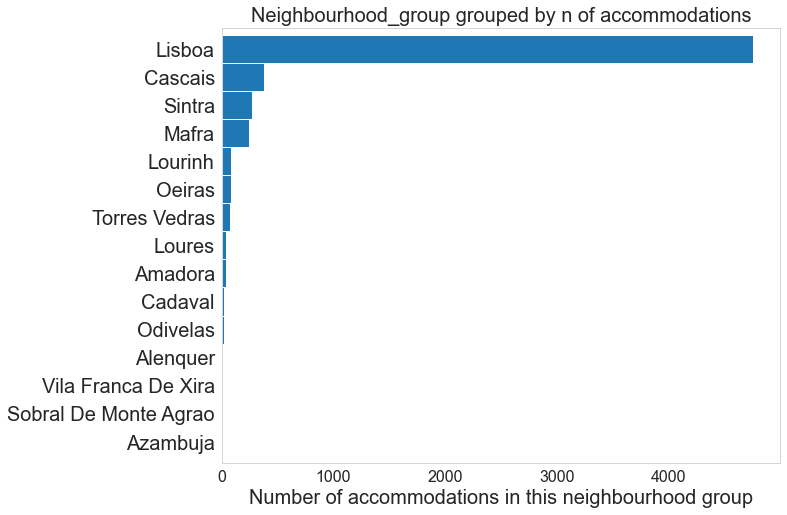

In [81]:
#We choose the data we want to plot and set (ascending=True) so we set the order of the plot
feq =airdfc["neighbourhood_group"].value_counts().sort_values(ascending=True)
#Figsize and width
ax =feq.plot.barh(figsize=(10, 8), width=1)
#Graph tittle
plt.title("Neighbourhood_group grouped by n of accommodations", fontsize=20)
#Label and fontsize
plt.xlabel("Number of accommodations in this neighbourhood group", fontsize=20)
#No grids
ax.grid(False)
plt.show()

## Putting the plot in the center of our notebook :)
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)


And after that, we can filter the desirable "neighborhood_group".

In [50]:
airdfc.drop(airdfc.loc[airdfc["neighbourhood_group"]!= "Lisboa"].index, inplace=True)

And now, with the "neighborhood".

In [51]:
grouped = airdfc.groupby(["neighbourhood"]).size()
grouped

neighbourhood
Ajuda                       67
Alcntara                   100
Alvalade                    34
Areeiro                     52
Arroios                    405
Avenidas Novas              95
Beato                       41
Belm                        86
Benfica                     14
Campo de Ourique            88
Campolide                   39
Carnide                     16
Estrela                    358
Lumiar                      19
Marvila                     27
Misericrdia                906
Olivais                     38
Parque das Naes             57
Penha de Frana             143
Santa Clara                  4
Santa Maria Maior         1248
Santo Antnio               328
So Domingos de Benfica      27
So Vicente                 567
dtype: int64

As a result, we have 57 entries for “Parque das Naes” which is the neighborhood that we want. To improve our productivity, we should filter the data that we need.


In [52]:
airdfc.drop(airdfc[airdfc["neighbourhood"]!= "Parque das Naes"].index, inplace=True)

We should check if everything is alright.

In [29]:
airdfc.head(10)

id                                  name  ...  price minimum_nights
703    1343550   One Room Apartment Parque da Nações  ...     50              5
1260   2995311     ORIENTE DNA COSY STUDIO 4 BY W2Lx  ...     34              3
1674   3895728                   Apartamento do alto  ...     55              3
1866   4480774            ORIENTE CINEMA APT BY W2Lx  ...     38              3
1889   4591728  Quiet and Spacious T1 by Expo Marina  ...     55              2
2446   6273183      ORIENTE DNA TRAVEL APT 3 BY W2Lx  ...     42              1
3334   9065151      Confortable and Spacious T1 flat  ...     55              2
3473   9785903                        Nice campervan  ...     50              7
4189  12390823             ORIENTE MUSIC APT BY W2Lx  ...     44              3
4268  12648845                  Tagus Life Apartment  ...     45              2

[10 rows x 11 columns]

In [53]:
print("The dataframe has {} columns and {} rows".format(airdfc.shape[1],airdfc.shape[0]))

The dataframe has 11 columns and 57 rows


Looks fine! But we can always improve it. How can he/she access this new dataset? To deliver an excellent final “product,” let’s save the dataset in a new place and add the prefix "https://www.airbnb.com.br/rooms/" in the "id" row so the link can lead the user directly to the site room. 

In [54]:
airdfc['id'] = "https://www.airbnb.com.br/rooms/" + airdfc['id'].astype(str)
airdfc.to_csv("airbnb_list2021.csv",sep=";")

To give the final touch and make it easier to check the best location is, we can plot an interactive map. In this case, we can use the variables “latitude” and “longitude” to create a map in the notebook so our friends can consult anytime they want.

In [55]:
m = folium.Map([40 ,14], zoom_start=5,width="%100",height="%100")
#going to put our latitude and longitude in a list
locations = list(zip(airdfc.latitude, airdfc.longitude))
#Select the data for the markers and the label for it.
cluster = plugins.MarkerCluster(locations=locations,popups=airdfc['id'].tolist())
#Add the markers to the map
m.add_child(cluster)
m


### Conclusion

This project was meant to show the beginners that you could do a lot of fun stuff with just basic acknowledgment of python and some libraries. That’s no need to rush your process, try to have fun. Try this with a cool place that you want to visit after this pandemic is over, try a fancy data visualization or try to filter several neighboourds instead of just one! Play with it :) 
This is my first article and I really want feedback. Was a basic exploration just to train some skills and attract more people with an easy and fun project. I hope you guys enjoyed it and feel free to contact me :)
